## 🦄 유니콘 기업 발굴하기 
### 목적: 2015년 ~ 2019년 기준  제공된 데이터를 보고 유니콘 기업으로 보이는 기업들 찾기

- 해당 데이터는 국민연금 가입 사업장 내역이라는 공개 데이터를 기반으로 함 (국민연금을 가입한 모든 기업 데이터를 통해 여러 인사이트 도출)
- 미리 진행된 데이터 전처리를 통해 기업을 식별할 수 있는 테이블 제공
- 회사의 국민연금 고지금액, 매출액, 인원수를 월별로 볼 수 있음.

---

## EDA 진행 방식 
### 1. 데이터 확인 
### 2. EDA (데이터 탐색) - 유니콘 기업 선정 기준 설립
### 3. 모델링 검증 - 정량적 방식이 필요한지 참고용도
### 4. 유니콘 기업 선정
### 5. 느낀점과 추후 보안점

---

### 🦄 유니콘 기업이란?
- 설립된지 **10년 이하**의 글로벌 기준 **10억달러(1조원) 이상**의 기업가치가 있는 비상장 기업 (**인수합병 및 상장기업 제외**)
    - 100억 달러(10조) 이상은 **데카콘**
    - 1000억 달러(100조)은 **헥토콘**
    - M&A나 기업공개(IPO)를 통해 자금 회수에 성공한 기업은 **엑시콘**
    - 유니콘에 성공했지만 엑시트(자금회수)에 실패한 회사는 **좀비콘**

### ✅ 한국에서 유니콘 기업이 되려면?
- 실적 보다 **투자를 유치하면서 기업가치를 높여**간다. (일반적으로 스타트업 창업 후 벤처투자를 받으면서 기업가치를 인정받는 것이 중요)
- **시리즈 A(투자금 규모 10억원), B(투자금 규모 100억원), C(투자금 규모 100억원 이상) 투자와 같이 계단식 투자**를 받아 스타트업은 기업 가치를 높여가고 나중에 다른 대기업에 매각되거나 IPO를 통해 상장 후 자금을 회수 함.
- 요즘 중소벤처기업부에서 추친하는 **K-유니콘 프로젝트**라는 제도가 있음. (유니콘 후보기업 집중발굴 및 스케일업 지원)
- **아기유니콘(기업가치 1천억원 미만) -> 예비 유니콘(기업가치 1천억원 이상 1조 미만) -> K-유니콘(기업가치 1조원 이상)**
<center>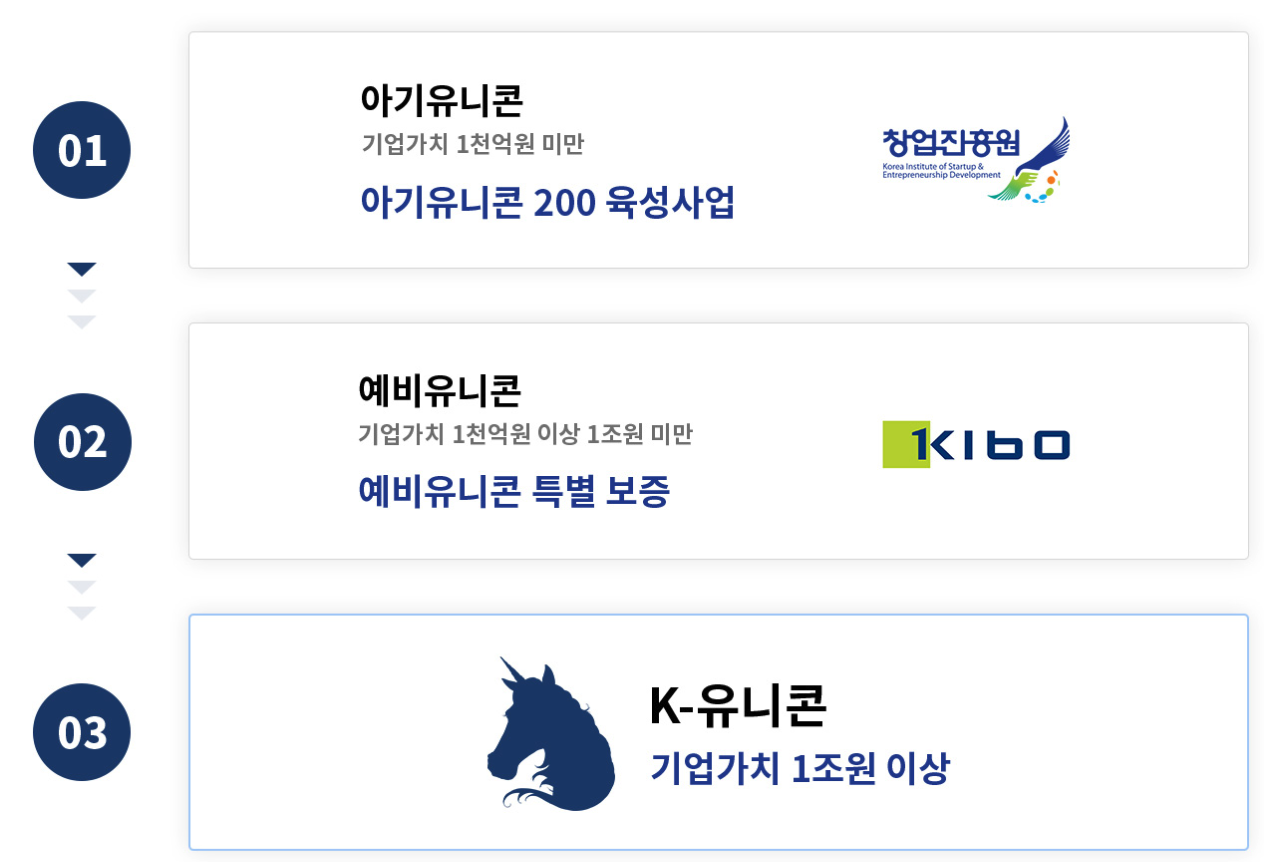</center>

## 1. 데이터 확인 
- 데이터 확인
- 결측치 확인
- 데이터 타입 확인
- 각 컬럼별 row 값 정리
- 상관관계로 EDA에 필요한 유의미한 데이터 추출하기

In [1]:
# 패키지 불러오기 
import pandas as pd  # pandas
import numpy as np   # numpy
import matplotlib   # matplotlib
import matplotlib.pyplot as plt  # mpatplotlib.pyplot
%matplotlib inline
import matplotlib.dates as mdates #  그래프의 원하는 날짜 형식으로 포멧 셋팅 Matplotlib.dates
import matplotlib.animation as animation # 그래프 애니메이션 효과 셋팅 Matplotlib.animation
import missingno as msno # 결측치 그래프 확인 missingno 패키지


# 한글 설정 및 그래프 설정
from matplotlib import font_manager, rc   
plt.rcParams['axes.unicode_minus'] = False   # 그래프 한글 설정을 위해 matplotlib에서 rc 불러오기 (한글 깨짐 현상을 막아줌)
sns.set_style('darkgrid') # seaborn 그래프 background 회색으로 설정 
sns.set_context('talk') # 컨텍스트 매개 변수를 변경 플롯의 레이블에 대한 기본 글꼴 크기를 제어하는데 사용
sns.set(font_scale = 1)

import platform
if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~')

import plotly.express as px # plotly.express
import plotly.io as pio # plotly 라이브러리를 표기하기 위해 추가한 코드 
pio.renderers.default = "notebook_connected"

# 경고표시 무시
import warnings
warnings.filterwarnings('ignore')

### 1-1. 데이터 확인

In [2]:
# 데이터 불러오기
nps = pd.read_csv('data/company_nps_data.csv', encoding='cp949')
nps.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


- 각 컬럼 정보
    - 회사ID: 기업 고유 번호 
    - 연매출액: 연도별 매출 (기준: 천 원)
    - 년도: 기준 - 2015년 부터 2019년 까지
    - 월: 기준 - 2015년 11월 부터 2019년 12월 까지
    - 월별_연금보험료: 회사에서 납부하는 연금보험료
    - 월별_직원수

In [3]:
# 데이터 크기 확인 - row: 99801, column - 6
nps.shape

(99801, 6)

### 1-2. 결측치 확인

In [4]:
# 결측치 확인하기 - 결측이 없음.
for i in nps.columns:
    ab = nps[i].isnull().sum()
    if ab < 99801:
        print(i + "has {} null values.".format(ab))
        print()

회사IDhas 0 null values.

연매출액has 0 null values.

년도has 0 null values.

월has 0 null values.

월별_연금보험료has 0 null values.

월별_직원수has 0 null values.



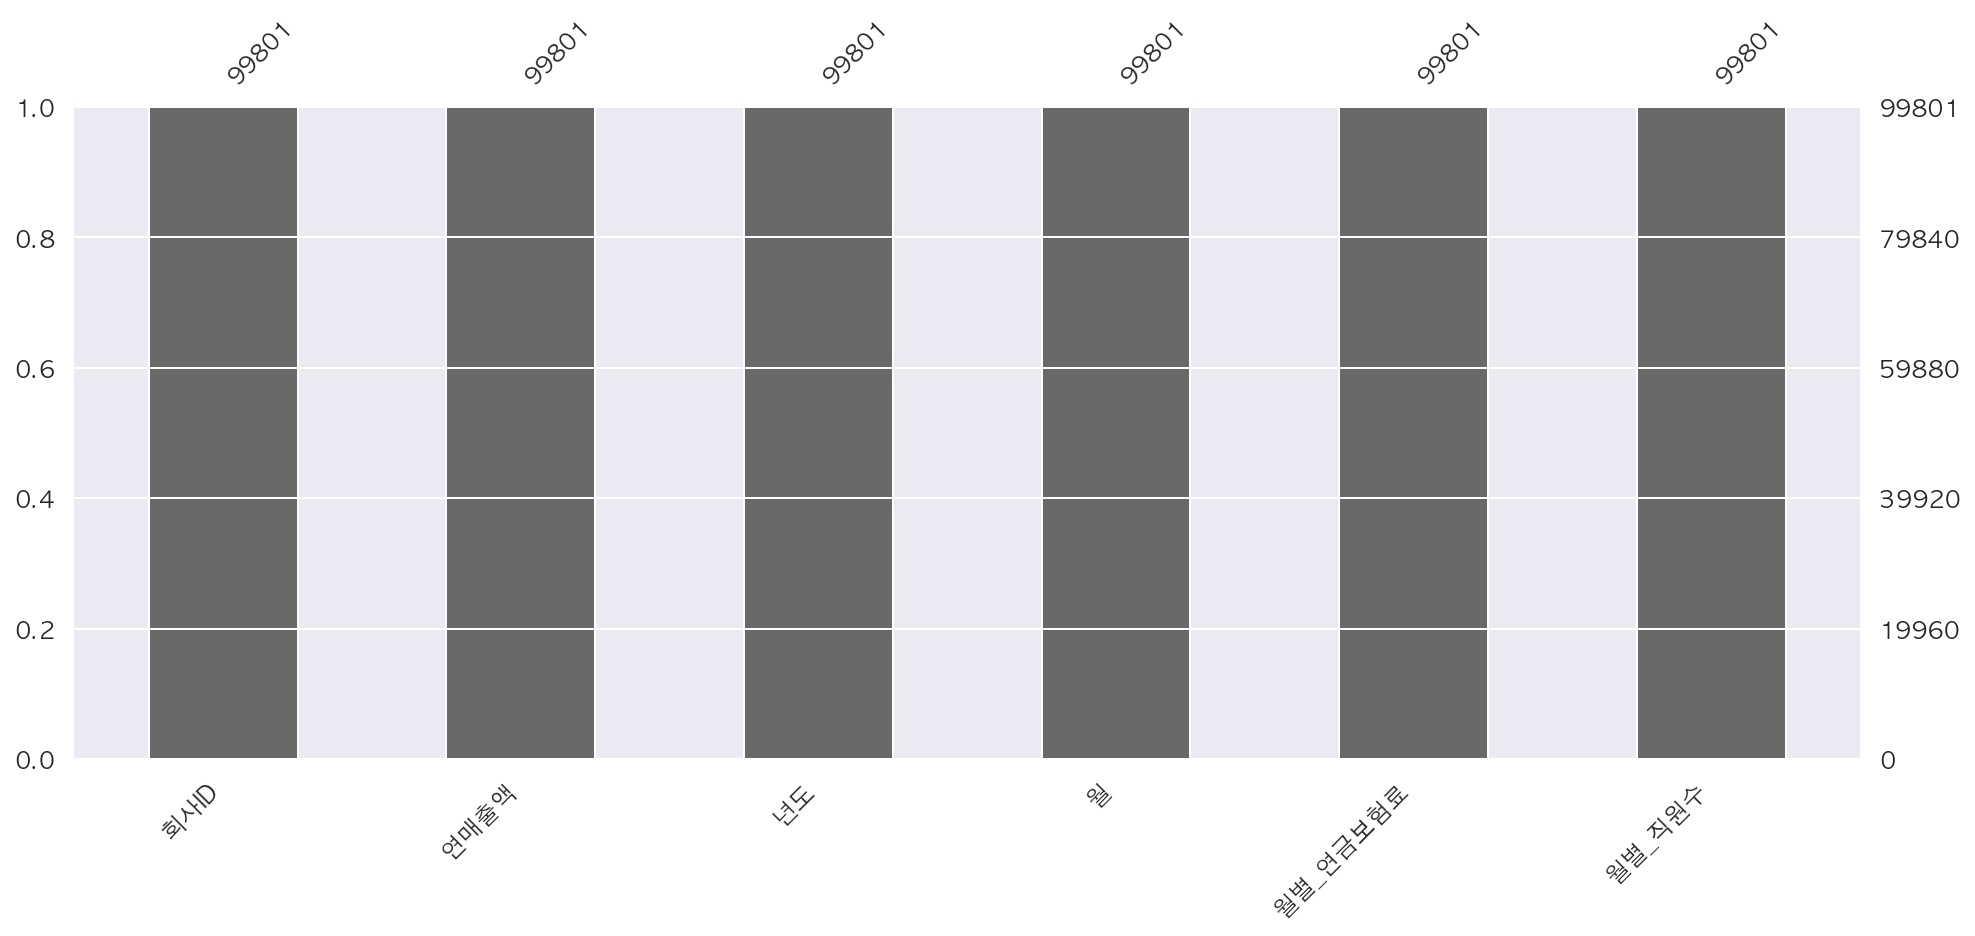

In [5]:
# 결측치 그래프로 나타내기
msno.bar(nps, fontsize=12, figsize=(16,6));

### 1-3. 데이터 타입 확인 

In [6]:
# 날짜 컬럼을 추가하여 날짜 정리 
nps['년도'] = nps['년도'].astype('str')

nps['년도'] = pd.to_datetime(nps['년도'], format="%Y", errors='raise')
nps['월'] = pd.to_datetime(nps['월'], format="%m", errors='raise')

nps['년도'] = nps['년도'].dt.year
nps['월'] = nps['월'].dt.month

nps.sort_values(["년도", "월"], inplace=True)

nps['날짜'] = nps['년도'].astype(str) + "-" + nps['월'].astype(str)

In [7]:
# 가독성을 위해서 컬럼 순서 변경 
nps = nps[["날짜", "회사ID", "년도", "월", "연매출액", "월별_직원수", "월별_연금보험료"]]
nps.head()

,날짜,회사ID,년도,월,연매출액,월별_직원수,월별_연금보험료
3,2015-11,386420,2015,11,4815584,14,3795900
93,2015-11,145900,2015,11,4753036,25,4153140
97,2015-11,139359,2015,11,50216484,39,10547240
193,2015-11,135634,2015,11,13168146,44,10895560
327,2015-11,190720,2015,11,3680361,4,945900


In [8]:
# 데이터 타입 확인 
nps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99801 entries, 3 to 96091
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   날짜        99801 non-null  object
 1   회사ID      99801 non-null  int64 
 2   년도        99801 non-null  int64 
 3   월         99801 non-null  int64 
 4   연매출액      99801 non-null  int64 
 5   월별_직원수    99801 non-null  int64 
 6   월별_연금보험료  99801 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 6.1+ MB


### 1-4. 각 컬럼당 row 값 현황 정리

In [9]:
# 각 column당 row 값 현황 정리 
for col in nps.columns:
    print(f"column : {col}")
    print(f"The number of unique : {nps[col].nunique()}")  # nunique: 유니크한 value의 갯수를 나타내는 함수
    print()

column : 날짜
The number of unique : 50

column : 회사ID
The number of unique : 5000

column : 년도
The number of unique : 5

column : 월
The number of unique : 12

column : 연매출액
The number of unique : 10108

column : 월별_직원수
The number of unique : 1187

column : 월별_연금보험료
The number of unique : 50747



### 1-5. 상관관계 살펴보기 

In [10]:
# 데이터 요약 
nps.describe()

,회사ID,년도,월,연매출액,월별_직원수,월별_연금보험료
count,9.980100e+04,99801.000000,99801.000000,9.980100e+04,99801.000000,9.980100e+04
mean,2.762982e+05,2016.967125,6.714352,3.053589e+07,37.623431,9.734079e+06
std,1.339032e+05,0.976688,3.512966,3.016647e+08,146.947194,4.347256e+07
min,6.300000e+01,2015.000000,1.000000,-7.882176e+06,0.000000,0.000000e+00
25%,1.655300e+05,2016.000000,4.000000,1.409760e+06,6.000000,1.181160e+06
50%,2.591490e+05,2017.000000,7.000000,3.573585e+06,11.000000,2.332760e+06
75%,3.826560e+05,2018.000000,10.000000,9.582321e+06,24.000000,5.591860e+06
max,5.159723e+06,2019.000000,12.000000,1.132878e+10,3133.000000,9.780673e+08


In [11]:
# 피어슨 상관관계 계산
nps.corr(method='pearson')

,회사ID,년도,월,연매출액,월별_직원수,월별_연금보험료
회사ID,1.000000,-0.033194,0.008969,-0.001675,0.007430,-0.010393
년도,-0.033194,1.000000,-0.096107,0.015202,-0.002206,0.008121
월,0.008969,-0.096107,1.000000,-0.001347,0.002000,0.005006
연매출액,-0.001675,0.015202,-0.001347,1.000000,0.638125,0.729694
월별_직원수,0.007430,-0.002206,0.002000,0.638125,1.000000,0.962101
월별_연금보험료,-0.010393,0.008121,0.005006,0.729694,0.962101,1.000000


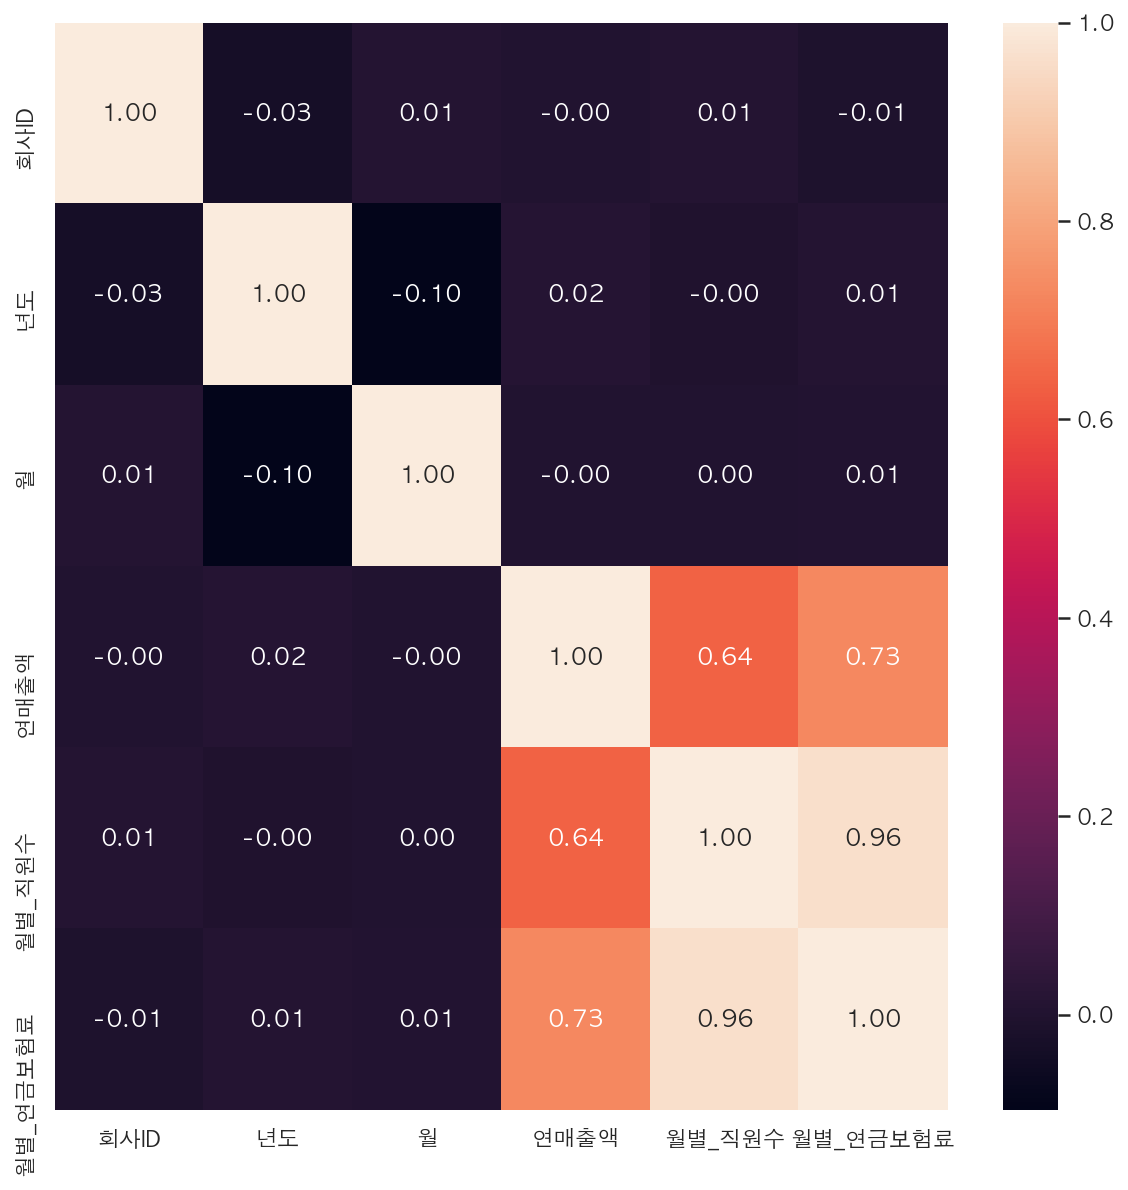

In [12]:
# 상관관계 heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data = nps.corr(), annot=True, fmt = '.2f');

- 상관관계를 살펴보니 월별_직원수 대비 월별_연금보험료가 가장 높은 상관관계를 나타냈다.(**0.96**)
- 연매출액 대비 월별_연금보험료의 상관관계 수치는 **0.73**로 나타났다.
- 예상한 직원 수 대비 연 매출액의 상관관계 수치는 **0.64**로 나타났다.

### 요약
- 총 데이터 수 **99,801개**
- 컬럼은 6개: **회사ID, 연매출액, 년도, 월 , 월별_연금보험료, 월별_직원수**
- 결측치 없음 (이미 전처리가 되어있는 데이터라 데이터 자체는 깨끗함)
- 데이터가 모두 정수형 데이터 - **'년-월'** 형태의 날짜 데이터 추가
- 년 도는 총 **5년으로 구성 (2015~2019년)**, 총 **5000개의 회사가 존재**
- 음의 상관관계를 나타내는 데이터는 **연매출액, 월별_직원수, 월별_연금보험료** 였다.

---

## 2. EDA - 데이터 탐구 
- 연 매출액과 월별_직원수를 기준으로 데이터 탐구 
- 현존 유니콘 기업 조사 - 조사 기준 설립 

 
### 2-1. 연 매출액과 월별_ 직원수를 기준으로 데이터 탐구 진행
- 상관계를 살펴보니 몇 가지의 인사이트가 도출 되었다.
1. 월별 직원수 대비 연금보혐료는 직원의 연봉과 연관이 있다. (그래서 상관관계가 높았다.)
2. 연매출 대비 월별 연금보험료는 회사가 내는 세금과 연관이 있다.
3. 직원 수 대비 연 매출액은 그 회사의 비지니스 상황과 규모를 나타낸다.
- 결론은 회사의 가치를 메기는 것은 그 회사의 비지니스 상황과 규모를 나타내는 것이 아닐까 라는 생각을 하게 되어, 월별 직원수와 연 매출액을 기준으로 유니콘 기업을 산정해보고자 한다.

In [13]:
# 연 매출 기준 상위 100개 기업을 뽑기위한 전처리
nps_sales = nps.loc[:, ["년도",'회사ID','연매출액']] # 컬럼 "년도", "회사ID", "연매출액"만 추출
nps_sales = nps_sales.drop_duplicates('연매출액') # 연매출액에 있는 중복값 제거 
nps_sales = nps_sales .sort_values(by='연매출액' ,ascending=False)  # 매출액 기준으로 내림차순 정렬  

In [14]:
# 년 도별 연매출 기준 정렬 
top_100_2015 = nps_sales.loc[nps_sales["년도"] == 2015].sort_values(by='연매출액' ,ascending=False)[:100]
top_100_2016 = nps_sales.loc[nps_sales["년도"] == 2016].sort_values(by='연매출액' ,ascending=False)[:100]
top_100_2017 = nps_sales.loc[nps_sales["년도"] == 2017].sort_values(by='연매출액' ,ascending=False)[:100]
top_100_2018 = nps_sales.loc[nps_sales["년도"] == 2018].sort_values(by='연매출액' ,ascending=False)[:100]
top_100_2019 = nps_sales.loc[nps_sales["년도"] == 2019].sort_values(by='연매출액' ,ascending=False)[:100]
top_100_sales = pd.concat([top_100_2015,top_100_2016,top_100_2017,top_100_2018,top_100_2019])
top_100_sales

,년도,회사ID,연매출액
54027,2015,227415,4961710828
75162,2015,227414,4047655229
58484,2015,294649,3822716363
18003,2015,126831,2000958572
90097,2015,381180,1336936032
...,...,...,...
96020,2019,47306,345228
48470,2019,2693684,238076
38494,2019,294028,150938
28645,2019,256445,126478


In [15]:
# plotly express를 통해 시각화 
plot = px.line(top_100_sales, x='년도', y='연매출액', color="회사ID")
plot

- top 100 기업중 그래프상 년도별 연 매출액을 기준으로 보았을 때 크게 성장하고 있는 기업은 **419945** 이다. 
- 그리고 중간에 연간 매출액이 비어진 경우가 있는데, 매출액이 비워진 이유가 회사가 없어진 이유도 들 수 있겠지만, 매출이 불안정한 스타트업 특성상, 해당 년도에 매출을 일으키지 못해서 그런 것이 아닐까? 라는 생각을 함. (전자공시를 살펴보니 스타트업중 그런 기업들이 더러 있었다.)
- 그럼 현재 등록되어있는 유니콘 기업들을 조사해보고 기준을 정해야 할 것으로 판단되어 현존하는 유니콘 기업들을 조사하기로 함.

In [16]:
# top100의 기업들 피벗 테이블로 정리
top_100_sales = top_100_sales.pivot(index='년도', columns='회사ID', values='연매출액')
top_100_sales

회사ID,63,95,102,295,597,2037,2842,5202,5452,8208,...,547586,567650,570867,580356,581504,620445,630190,2693684,3312354,5159723
년도,,,,,,,,,,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,1.132878e+10,656947437.0,742658938.0,83776697.0,208141595.0,NaN,113877008.0,90027705.0,252376511.0,NaN,...,283610660.0,113663897.0,NaN,278460000.0,NaN,NaN,657402850.0,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,16308882.0,NaN,NaN,NaN,4151961.0,...,NaN,NaN,1500.0,NaN,1079693.0,767324.0,NaN,238076.0,1451563.0,2591898.0


### 2-2. 현존 유니콘 기업 조사 - 매출액, 직원수, 업력 등
참고자료 
- 유니콘 기업: [한국유니콘기업리스트현황](https://better-together.tistory.com/191) - 2021 유니콘기업 순위 참고 (**박선하 님** 공유해주신 자료)
- 유니콘 기업 매출액: [전자공시DART](http://dart.fss.or.kr/) - 유니콘 기업 감사보고서 매출액 참고 (2015년 ~ 2019년 기준, 단위: 백 만원)
- 유니콘 기업 직원수: [the vc](https://thevc.kr/) - 유니콘 기업 직원수 참고 (기준: 데브이씨에 있는 현재 데이터 기준)

In [17]:
k_unicorn = pd.DataFrame({'회사명': ["쿠팡", "크래프톤", "옐로모바일", "비바리퍼블리카", "위메프", 
                                   "무신사", "지피클럽", "엘앤비코스메틱", "에이프로젠", "야놀자", "쏘카"],
                         '창립일': ["2010-08", "2007-03", "2012-08", "2013-04", "2010-05", "2012-06",
                                "2003-09", "2009-04", "2004-04", "2007-02", "2011-10"],
                         '등재시점': ["2014-05", "2018-08", "2014-11", "2018-12", "2015-09", "2019-11",
                                 "2018-10", "2016-01", "2019-05", "2019-06", "2020-10"],
                         '업종': ["온라인쇼핑", "온라인게임", "모바일", "핀테크", "온라인쇼핑", "패션커머스", "화장품",
                               "화장품", "바이오", "여행플랫폼", "공유차량"],
                         '창립일대비유니콘기업등재업력': [4, 11, 2, 5, 5, 7, 15, 7, 15, 12, 9],
                         '매출액': [16499488, 98828, 22061, 197580, 894771, 466409, 1082928, 1408641,
                                198030, 343396, 676643],
                         '직원수': [22531, 1290, 5, 453, 1343, 566, 169, 153, 278, 933, 362]
                         })
k_unicorn

,회사명,창립일,등재시점,업종,창립일대비유니콘기업등재업력,매출액,직원수
0,쿠팡,2010-08,2014-05,온라인쇼핑,4,16499488,22531
1,크래프톤,2007-03,2018-08,온라인게임,11,98828,1290
2,옐로모바일,2012-08,2014-11,모바일,2,22061,5
3,비바리퍼블리카,2013-04,2018-12,핀테크,5,197580,453
4,위메프,2010-05,2015-09,온라인쇼핑,5,894771,1343
5,무신사,2012-06,2019-11,패션커머스,7,466409,566
6,지피클럽,2003-09,2018-10,화장품,15,1082928,169
7,엘앤비코스메틱,2009-04,2016-01,화장품,7,1408641,153
8,에이프로젠,2004-04,2019-05,바이오,15,198030,278
9,야놀자,2007-02,2019-06,여행플랫폼,12,343396,933


In [69]:
# 대표적으로 쿠팡의 매출과 매출증가율 조사 
coupang = pd.DataFrame({'년도': [2015, 2016, 2017, 2018, 2019],
                       '매출(백만)': [1133752, 1195941, 2681390, 4347684, 7140720],
                       '매출증가율(%)': [0, 5.4, 124, 62, 64]})
coupang

,년도,매출(백만),매출증가율(%)
0,2015,1133752,0.0
1,2016,1195941,5.4
2,2017,2681390,124.0
3,2018,4347684,62.0
4,2019,7140720,64.0


In [18]:
k_unicorn.describe()

,창립일대비유니콘기업등재업력,매출액,직원수
count,11.000000,1.100000e+01,11.000000
mean,8.363636,1.989889e+06,2553.000000
std,4.410731,4.832353e+06,6641.341642
min,2.000000,2.206100e+04,5.000000
25%,5.000000,1.978050e+05,223.500000
50%,7.000000,4.664090e+05,453.000000
75%,11.500000,9.888495e+05,1111.500000
max,15.000000,1.649949e+07,22531.000000


- 자료를 정리해서 살펴보니 11개의 유니콘 기업은 창립일 대비 등재년수가 평균 8년이 걸렸음.
- 매출액 기준 가장 높은 매출액이 **16조 4,994억 원(쿠팡)**, 가장 낮은 매출액이 **220억 원(옐로 모바일)**, 중간 매출액이 **4,664억 원(무신사)** 이다.
- 직원수 기준 가장 많은 곳이 **22,531 명**, 가장 낮은 곳이 **5 명**, 중간이 **453 명** 이다.
- 업력이 가장 긴 기간 **15년**, 가장 짧은 기간 **2년**, 중간이 **7년** 이다.

### 현존하는 유니콘 기업을 참고한 유니콘 기업  최소 기준 
####  ✅ 연 매출 300억 이상
#### ✅ 직원수: 100명 이상 
#### ✅ 업년: 2년 이상 

---

## 3. 모델링 검증
- 위에서 조사한 현존하는 유니콘 기업들을 참고하여 아래와 같은 기준으로 회사 추리기
1. 업력이 2년 이상인 데이터만 이용
2. 연 매출액이 최소 300억 원 이상인 데이터만을 이용 
3. 직원수 최소 100 명 이상인 데이터만을 이용 

### 3-1. 설정한 기준으로 회사 추리기 

In [19]:
# 월별 연금 보혐료와 월별 직원수가 0이면 제외 
nps = nps.drop(index=nps.query('월별_직원수 == 0').index)
print(nps)

            날짜    회사ID    년도   월      연매출액  월별_직원수  월별_연금보험료
3      2015-11  386420  2015  11   4815584      14   3795900
93     2015-11  145900  2015  11   4753036      25   4153140
97     2015-11  139359  2015  11  50216484      39  10547240
193    2015-11  135634  2015  11  13168146      44  10895560
327    2015-11  190720  2015  11   3680361       4    945900
...        ...     ...   ...  ..       ...     ...       ...
92271  2019-12  478922  2019  12   1746665       9   1557900
94873  2019-12  303882  2019  12  19778625      18   4528760
95989  2019-12  130261  2019  12  15498542      87  24818540
95991  2019-12  297682  2019  12  17780858      46  14853280
96091  2019-12  445499  2019  12   2017051       7   1267000

[99788 rows x 7 columns]


In [20]:
# 월별 직원수가 0이면 제외 
nps = nps.drop(index=nps.query('월별_직원수 == 0').index)

# 1. 업력이 2년 이상만 남기기
length_nps = nps.groupby("회사ID").filter(lambda x : len(x) > 24) # 업력이 2년 이상 (12개월 * 2년)

# 2. 연매출액 300억 이상인 회사만 남기기
sales_nps = length_nps[length_nps["연매출액"] > 30000000]

# 3. 직원수 100명 이상인 회사만 남기기
worker_nps = sales_nps[sales_nps["월별_직원수"]>=100]

print("업력 2년이상 회사 데이터:", len(length_nps), "->", "연매출액 300억 이상인 회사 데이터:", len(sales_nps), "->", "직원수 100명 이상인 회사 데이터:", len(worker_nps))

업력 2년이상 회사 데이터: 55358 -> 연매출액 300억 이상인 회사 데이터: 8306 -> 직원수 100명 이상인 회사 데이터: 3577


In [21]:
# 추려진 회사 개수 총 116개
print("1차로 추려진 회사 개수:", len(worker_nps["회사ID"].unique()), "개")
print(worker_nps["회사ID"].unique())

1차로 추려진 회사 개수: 116 개
[128638 130281 231499 403462 126664 426429 294620 469473 394723 128916
 127202 127669 128488 129652 126831 126538 128076 469789 126814 469556
 294367 231384 130577 130023 403351 127180 440613 294530 128896 130729
 126516 127366 130322 128264 127732 126983 295376 130647 294387 128174
 129436 439986 510329 403434 227415 127839 294649 381344 126606 129861
 127503 231173 507086 128485 126802 126674 127090 127142 128415 127065
 227414 231080 294337 129310 403754 126772 294790 129718 128440 127060
 403657 129828 403359 381180 127511 295513 469677 128539 126521 130203
 129377 403504 420082 129370 469458 420076 129486 128592 469567 419998
 420304 419977 419945 420165 131114 420046 420008 403470 130386 130084
 130344 231383 131049 130911 128405 130128 440094 130191 130387 440559
 231260 130899 231090 470125 130927 131397]


### 3-2. 모델링 검증 - 선형회귀, 랜덤포레스트

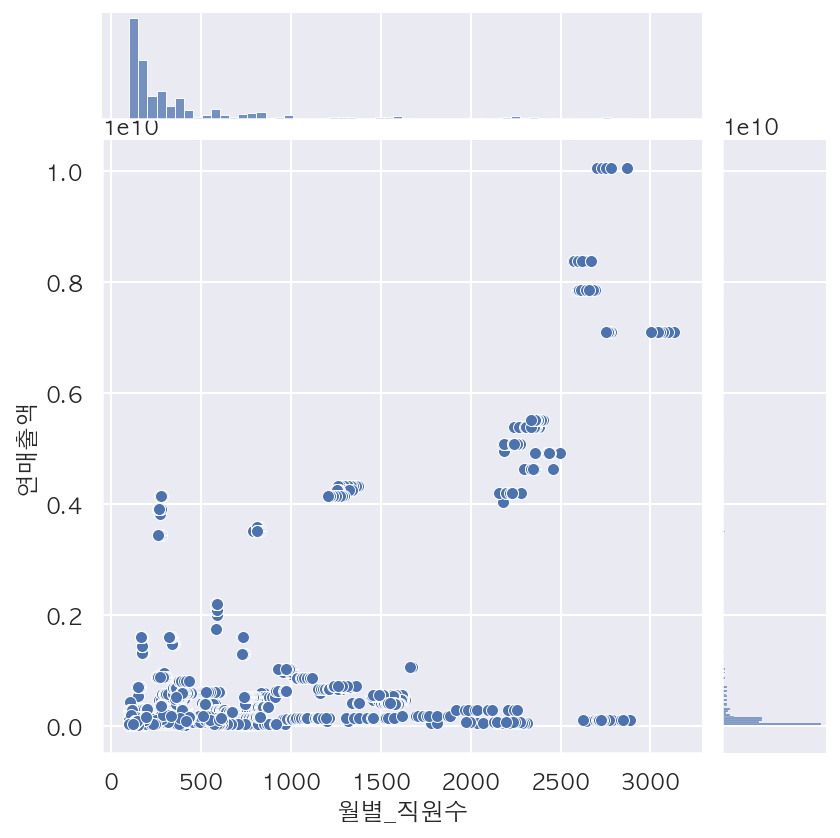

In [22]:
joint = sns.jointplot(x='월별_직원수',y='연매출액',data=worker_nps)
joint.set_axis_labels(xlabel='월별_직원수',ylabel='연매출액')

In [23]:
# Linear Regression 모델 결과 확인 함수 
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def get_results(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    pred_test = reg.predict(X_test)

    print('explained_variance_score: {}'.format(explained_variance_score(y_test, pred_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(y_test, pred_test)))
    print('r2_score: {}'.format(r2_score(y_test, pred_test)))

In [24]:
# Random forest 모델 결과 확인 함수
def get_results_rf(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    pred_test = rf.predict(X_test)

    print('explained_variance_score: {}'.format(explained_variance_score(y_test, pred_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(y_test, pred_test)))
    print('r2_score: {}'.format(r2_score(y_test, pred_test)))

In [25]:
# 1차로 추린 회사 기준 Linear Regression 모델 결과
worker_nps_new = worker_nps[worker_nps['월별_직원수'] != 0]
worker_nps_new.reset_index(drop=True, inplace=True)
X = worker_nps_new.drop(['날짜', '회사ID', '년도', '월', '연매출액', '월별_연금보험료'],axis=1)
y = worker_nps_new['연매출액']

get_results(X,y)

explained_variance_score: 0.3559133399371084
mean_squared_errors: 1.0174238768895108e+18
r2_score: 0.35238365280531647


In [26]:
# 1차로 추린 회사 기준 Random forest 모델 결과
worker_nps_new = worker_nps[worker_nps['월별_직원수'] != 0]
worker_nps_new.reset_index(drop=True, inplace=True)
X = worker_nps_new.drop(['날짜', '회사ID', '년도', '월', '연매출액', '월별_연금보험료'],axis=1)
y = worker_nps_new['연매출액']

get_results_rf(X,y)

explained_variance_score: 0.12602939924589507
mean_squared_errors: 1.3820235128071905e+18
r2_score: 0.12030664953762016


In [27]:
# 원본데이터기준 Linear Regression 모델 결과
nps_new = nps[nps['월별_직원수'] != 0]
nps_new.reset_index(drop=True, inplace=True)
X = nps_new.drop(['날짜', '회사ID', '년도', '월', '연매출액', '월별_연금보험료'],axis=1)
y = nps_new['연매출액']

get_results(X,y)

explained_variance_score: 0.4280203271325652
mean_squared_errors: 4.7790658236326936e+16
r2_score: 0.42795443342349937


In [28]:
# 원본데이터기준 Random forest 모델 결과
nps_new = nps[nps['월별_직원수'] != 0]
nps_new.reset_index(drop=True, inplace=True)
X = nps_new.drop(['날짜', '회사ID', '년도', '월', '연매출액', '월별_연금보험료'],axis=1)
y = nps_new['연매출액']

get_results_rf(X,y)

explained_variance_score: 0.50774867048308
mean_squared_errors: 4.1128303702452936e+16
r2_score: 0.5077016165490605


### 요약
- 업력이 2년 이상, 연 매출액이 최소 300억 원 이상, 직원수 최소 100 명 이상을 기준으로 데이터를 추려보니 총 116개의 회사가 추려짐
- 추려진 데이터와 원본 데이터를 통해 선형회귀 모델과 랜덤포레스트 모델을 돌려본 결과 모델링을 써서 예측을 하기에 모델성능이 좋지 않음.
- 정량젹인 평가는 어려운 것으로 나타남.
- 앞에 기준을 잡은 연매출과 직원수를 기준으로 정성적인 방법으로 평가 

---

## 4. 유니콘 기업 선정 
- 116개를 추린 기업을 리스트업
- 앞에 조사한 쿠팡을 사례로 매출액 증감이 높은 회사를 기준으로 유니콘 기업 선정 

### 4-1. 116개 기업 리스트업

In [47]:
selected_list = [128638, 130281, 231499, 403462, 126664, 426429, 294620, 469473, 394723, 128916,
 127202, 127669, 128488, 129652, 126831, 126538, 128076, 469789, 126814, 469556,
 294367, 231384, 130577, 130023, 403351, 127180, 440613, 294530, 128896, 130729,
 126516, 127366, 130322, 128264, 127732, 126983, 295376, 130647, 294387, 128174,
 129436, 439986, 510329, 403434, 227415, 127839, 294649, 381344, 126606, 129861,
 127503, 231173, 507086, 128485, 126802, 126674, 127090, 127142, 128415, 127065,
 227414, 231080, 294337, 129310, 403754, 126772, 294790, 129718, 128440, 127060,
 403657, 129828, 403359, 381180, 127511, 295513, 469677, 128539, 126521, 130203,
 129377, 403504, 420082, 129370, 469458, 420076, 129486, 128592, 469567, 419998,
 420304, 419977, 419945, 420165, 131114, 420046, 420008, 403470, 130386, 130084,
 130344, 231383, 131049, 130911, 128405, 130128, 440094, 130191, 130387, 440559,
 231260, 130899, 231090, 470125, 130927, 131397]

### 4-2. 매출액 증가율 계산

In [51]:
# 매출액 증가율 함수
# (공식) 매출액증가율(%) = (당기매출액-전기매출액)/전기매출 *100
def sales_up_rate(company_id):
    temp = nps.loc[nps['회사ID'] == company_id, :]

    # '회사ID', '년도', '월' 기준으로 오름차순 정렬한 데이터프레임 생성 
    sorted_nps = temp.sort_values(by=['회사ID', '년도', '월'], axis=0)
    sorted_nps.reset_index(drop=True, inplace=True)

    # 회사 id별로 매출액 증가율 계산 
    sales_rate = sorted_nps.drop_duplicates(['연매출액'], keep = 'first')
    sales_rate['매출액증가율'] = 0
    for i in range(1, len(sales_rate)):
        sales_rate['매출액증가율'].iloc[i] = round((sales_rate['연매출액'].iloc[i]-sales_rate['연매출액'].iloc[i-1])
        /sales_rate['연매출액'].iloc[i-1]*100, 4)
    
    # 필요없는 컬럼 정리
    sales_rate.drop(['월', '월별_연금보험료', '월별_직원수'], axis=1, inplace=True)
    
    #최종 데이터 프레임 리턴
    return sales_rate  # 데이터 프레임 리턴 

### 4-3. 유니콘 기업 선정

In [59]:
# 매출액 증가율이 30% 이상인 회사를 찾아봅시다.
for x in selected_list :
    new_df = sales_up_rate(x)
    if new_df['매출액증가율'].mean() > 30 :
        print(x,"회사의 매출액 증가율 :",new_df['매출액증가율'].mean())

294620 회사의 매출액 증가율 : 357.07217499999996
127366 회사의 매출액 증가율 : 46.779125
294337 회사의 매출액 증가율 : 30.837725
294790 회사의 매출액 증가율 : 30.699725
420165 회사의 매출액 증가율 : 31.787133333333333
403470 회사의 매출액 증가율 : 62.37505
231260 회사의 매출액 증가율 : 33.73695000000001


### 4-4. 5개 유니콘 기업 정보 - 매출 증가율 기준
- 1위: 회사ID: 294620 (매출 증가율: 357%)
- 2위: 회사ID: 403470 (매출 증가율: 62%)
- 3위: 회사ID: 127366 (매출 증가율: 47%)
- 4위: 회사ID: 231260 (매출 증가율: 34%)
- 5위: 회사ID: 420165 (매출 증가율: 32%)

In [79]:
# 1위 - 회사ID: 294620
sales_up_rate(294620)

,날짜,회사ID,년도,연매출액,매출액증가율
0,2015-11,294620,2015,58207287,0.0000
2,2016-1,294620,2016,889412348,1428.0086
14,2017-1,294620,2017,970998548,9.1730
26,2018-1,294620,2018,884648596,-8.8929


In [70]:
# 2위 - 회사ID: 403470
sales_up_rate(403470)

,날짜,회사ID,년도,연매출액,매출액증가율
0,2015-11,403470,2015,20264850,0.0000
2,2016-1,403470,2016,30071287,48.3914
14,2017-1,403470,2017,84741724,181.8028
26,2018-1,403470,2018,101101950,19.3060


In [71]:
# 3위 - 회사ID: 127366
sales_up_rate(127366)

,날짜,회사ID,년도,연매출액,매출액증가율
0,2015-11,127366,2015,55796793,0.0000
2,2016-1,127366,2016,74306879,33.1741
14,2017-1,127366,2017,175260490,135.8604
26,2018-1,127366,2018,206951173,18.0820


In [72]:
# 4위 - 회사ID: 231260
sales_up_rate(231260)

,날짜,회사ID,년도,연매출액,매출액증가율
0,2015-11,231260,2015,25343464,0.0000
2,2016-1,231260,2016,18380837,-27.4731
14,2017-1,231260,2017,51000425,177.4652
26,2018-1,231260,2018,43327752,-15.0443


In [73]:
# 5위 - 회사ID: 420165
sales_up_rate(420165)

,날짜,회사ID,년도,연매출액,매출액증가율
0,2016-1,420165,2016,79499854,0.0000
12,2017-1,420165,2017,93111515,17.1216
24,2019-1,420165,2019,165961753,78.2398


## 5. 느낀점과 추후 보완점

### 5-1. 느낀점
1. 유니콘 기업에 대해 공부할 수 있는 시간이었음.
2. 제한된 시간과 제한된 데이터로 분석이 힘들었지만, 이러한 상황에서도 분석을 해내야하는 것이 데이터 분석가의 역량임을 배움.
3. 정량적으로 분석할 수 없었던 것이 너무 아쉬움.
4. 월별 연금보험료를 제외하고 분석을 하였기 때문에 자칫 잘못하면 편향된 분석일 수 있어 주의가 필요함.

### 5-2. 추후 보완점
1. 이번 분석에 반영하지 않은 월별 연금보혐료와 직원수를 계산하여 회사의 규모가 어떻는지 보강
2. 현존하는 유니콘 기업들의 자료를 가져왔지만 너무 1차원 적인 자료만 가지고 옴, 추후 직원수, 매출, 연금보혐료 등의 자료를 더 수집하여 심도깊은 비지니스 분석 보강
3. 분석 방법론이 아직 정립되지 않음, 공부해서 좀 더 정량적인 분석을 할 수 있도록 노력